<a href="https://colab.research.google.com/github/casalazara/Machine-Learning-IELE/blob/master/Reto%203/Reto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto #3 

---
*   Nicolás Francisco Abondano Velasco
*   Carlos Andrés Salazar Aroca




# Preparación

## Librerías a usar

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import roc_curve, auc

## Lectura de los datos

In [2]:
datos = pd.read_table('https://raw.githubusercontent.com/casalazara/Machine-Learning-IELE/master/Reto%203/msd_genre_dataset.txt',delimiter=',', skiprows=9)
datos


,%genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,9.313765,3.201169,-0.152734,5.809709,14.930820,802.205948,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,22.691713,-2.872706,1.427725,-6.710730,22.704843,1561.307072,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,15.414011,4.556137,-1.877363,20.879475,58.459621,4644.001846,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,1.092876,1.479490,1.517015,8.562618,22.575460,691.140671,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,3.526177,1.535449,2.763958,3.388757,34.294994,1062.180815,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59595,soul and reggae,TRGYRMA128E078FC55,Erykah Badu,Danger,-10.162,88.951,4,11,1,348.96934,40.231725,46.282408,-13.655822,5.946664,14.348422,-2.672532,5.951254,6.642360,6.464162,15.298649,-9.405466,2.804328,42.698623,3135.495359,4339.425990,4081.017023,1248.530483,1655.677367,1000.603204,650.139870,487.150838,503.846148,641.508417,395.121718
59596,soul and reggae,TRZZFQW128E078FC5A,Erykah Badu,Hollywood,-5.466,130.615,3,9,1,332.32934,43.813328,5.111750,-2.705070,-3.683494,2.478473,-3.406668,9.211850,3.222463,14.685264,3.570673,-7.111661,0.793817,52.380335,2852.962520,3759.486850,3703.892394,1413.063618,1375.104641,951.467238,621.927699,418.507034,409.707771,504.899788,350.913794
59597,soul and reggae,TRAMYBB128F424D86D,Erykah Badu,Think Twice,-9.494,88.976,4,3,1,182.04689,38.561170,21.603243,-43.954808,11.649718,-0.986997,-10.491520,-6.064987,-12.996223,8.259268,1.978779,1.043235,-2.172406,30.401080,2950.171909,4288.018243,3694.070826,1336.559501,1613.559675,1017.527699,1155.936991,422.885540,519.527734,538.895856,313.775934
59598,soul and reggae,TRABWFM128F424D86A,Erykah Badu / Dead Prez,The Grind,-7.617,67.929,3,0,1,169.42975,41.280131,8.233834,-41.325696,-1.864784,7.786002,0.071631,-14.726294,-6.791047,3.653238,11.307610,-5.241222,6.730477,32.521843,2362.093998,2846.537149,3655.514437,1811.926034,1705.581355,1024.020625,1052.533278,533.349475,591.853048,598.054091,443.893807


## Filas de interés
El reto es resolver el problema de clasificación binaria con ayuda de Scikit-Learn (jazz and blues) vs (soul and reggae) por lo que vamos a ver primero qué géneros hay en todo el dataset.

In [3]:
datos['%genre'].unique()

array(['classic pop and rock', 'punk', 'folk', 'pop',
       'dance and electronica', 'metal', 'jazz and blues', 'classical',
       'hip-hop', 'soul and reggae'], dtype=object)

Vemos que no tenemos que hacer una combinación de jazz y blues pues ya están combinados por lo que se procederá a dejar las filas que sean de estos dos géneros.

In [4]:
datos = datos[(datos['%genre']=='jazz and blues') | (datos['%genre']=='soul and reggae')]
datos

,%genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
48942,jazz and blues,TRJBLUX12903CE16EC,John Stevens,Mango,-18.996,89.147,1,0,1,256.86159,34.738162,-50.948828,20.177101,15.139567,-25.836751,7.729854,-23.534951,-7.002408,9.661461,-0.752980,6.760097,17.112598,12.473302,1530.622764,1649.321047,1221.638146,501.717892,1091.743641,618.560018,402.236969,309.392602,233.206167,261.850703,240.834177
48943,jazz and blues,TRDPDLX12903CE16F2,John Stevens,Carnaval,-19.347,125.825,4,2,1,301.87057,34.033346,-39.733083,30.640298,19.646264,-45.231415,9.103613,-19.019581,1.119047,9.169450,3.999394,5.481075,10.958845,11.150600,1385.186042,1670.689893,1339.193474,889.918742,1148.824912,428.976969,306.187624,368.973940,227.275123,261.643570,332.356536
48944,jazz and blues,TRMWVBM128F42374DA,John Stevens,My Blue Heaven (Album Version),-9.472,121.707,4,2,1,158.85016,41.794197,-22.133118,3.518487,1.868059,13.542078,6.944006,15.406498,5.469637,4.822017,1.792601,-10.094489,-2.143374,41.497045,4513.995103,2640.398239,3070.791615,1347.758671,1499.491510,1015.076345,897.411739,608.034880,549.493210,481.149049,442.663136
48945,jazz and blues,TRMLIWL128F42374DE,John Stevens,Here_ There And Everywhere (Album Version),-14.406,83.012,5,0,1,181.26322,38.637530,-64.807191,-21.920418,-25.058971,-2.520459,-11.979187,-4.021518,-4.502840,1.350948,-6.206154,-2.557249,1.841054,26.279428,2304.536939,1187.644248,1311.170435,809.621938,612.699944,492.734025,525.801667,585.984445,278.578591,250.545027,348.842236
48946,jazz and blues,TRGFUVB128F42374E1,John Stevens,This Love (Album Version),-9.289,76.013,4,7,0,248.89424,43.089845,-27.351674,14.205832,-6.941388,21.278516,-9.627968,-6.894824,-2.730303,2.003291,-2.030266,-0.764775,1.769443,37.786419,3726.684916,1164.272074,1536.674490,1167.316436,580.604008,498.168561,607.747214,367.191519,403.532772,262.670577,272.634634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59595,soul and reggae,TRGYRMA128E078FC55,Erykah Badu,Danger,-10.162,88.951,4,11,1,348.96934,40.231725,46.282408,-13.655822,5.946664,14.348422,-2.672532,5.951254,6.642360,6.464162,15.298649,-9.405466,2.804328,42.698623,3135.495359,4339.425990,4081.017023,1248.530483,1655.677367,1000.603204,650.139870,487.150838,503.846148,641.508417,395.121718
59596,soul and reggae,TRZZFQW128E078FC5A,Erykah Badu,Hollywood,-5.466,130.615,3,9,1,332.32934,43.813328,5.111750,-2.705070,-3.683494,2.478473,-3.406668,9.211850,3.222463,14.685264,3.570673,-7.111661,0.793817,52.380335,2852.962520,3759.486850,3703.892394,1413.063618,1375.104641,951.467238,621.927699,418.507034,409.707771,504.899788,350.913794
59597,soul and reggae,TRAMYBB128F424D86D,Erykah Badu,Think Twice,-9.494,88.976,4,3,1,182.04689,38.561170,21.603243,-43.954808,11.649718,-0.986997,-10.491520,-6.064987,-12.996223,8.259268,1.978779,1.043235,-2.172406,30.401080,2950.171909,4288.018243,3694.070826,1336.559501,1613.559675,1017.527699,1155.936991,422.885540,519.527734,538.895856,313.775934
59598,soul and reggae,TRABWFM128F424D86A,Erykah Badu / Dead Prez,The Grind,-7.617,67.929,3,0,1,169.42975,41.280131,8.233834,-41.325696,-1.864784,7.786002,0.071631,-14.726294,-6.791047,3.653238,11.307610,-5.241222,6.730477,32.521843,2362.093998,2846.537149,3655.514437,1811.926034,1705.581355,1024.020625,1052.533278,533.349475,591.853048,598.054091,443.893807


Veamos cuantos valores hay por género musical

In [5]:
datos['%genre'].value_counts()

jazz and blues     4334
soul and reggae    4016
Name: %genre, dtype: int64

Podemos ver que el conjunto de datos está aproximadamente balanceado tal como dice en el enunciado.

## Variables de interés

In [6]:
datos.head()

,%genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
48942,jazz and blues,TRJBLUX12903CE16EC,John Stevens,Mango,-18.996,89.147,1,0,1,256.86159,34.738162,-50.948828,20.177101,15.139567,-25.836751,7.729854,-23.534951,-7.002408,9.661461,-0.752980,6.760097,17.112598,12.473302,1530.622764,1649.321047,1221.638146,501.717892,1091.743641,618.560018,402.236969,309.392602,233.206167,261.850703,240.834177
48943,jazz and blues,TRDPDLX12903CE16F2,John Stevens,Carnaval,-19.347,125.825,4,2,1,301.87057,34.033346,-39.733083,30.640298,19.646264,-45.231415,9.103613,-19.019581,1.119047,9.169450,3.999394,5.481075,10.958845,11.150600,1385.186042,1670.689893,1339.193474,889.918742,1148.824912,428.976969,306.187624,368.973940,227.275123,261.643570,332.356536
48944,jazz and blues,TRMWVBM128F42374DA,John Stevens,My Blue Heaven (Album Version),-9.472,121.707,4,2,1,158.85016,41.794197,-22.133118,3.518487,1.868059,13.542078,6.944006,15.406498,5.469637,4.822017,1.792601,-10.094489,-2.143374,41.497045,4513.995103,2640.398239,3070.791615,1347.758671,1499.491510,1015.076345,897.411739,608.034880,549.493210,481.149049,442.663136
48945,jazz and blues,TRMLIWL128F42374DE,John Stevens,Here_ There And Everywhere (Album Version),-14.406,83.012,5,0,1,181.26322,38.637530,-64.807191,-21.920418,-25.058971,-2.520459,-11.979187,-4.021518,-4.502840,1.350948,-6.206154,-2.557249,1.841054,26.279428,2304.536939,1187.644248,1311.170435,809.621938,612.699944,492.734025,525.801667,585.984445,278.578591,250.545027,348.842236
48946,jazz and blues,TRGFUVB128F42374E1,John Stevens,This Love (Album Version),-9.289,76.013,4,7,0,248.89424,43.089845,-27.351674,14.205832,-6.941388,21.278516,-9.627968,-6.894824,-2.730303,2.003291,-2.030266,-0.764775,1.769443,37.786419,3726.684916,1164.272074,1536.674490,1167.316436,580.604008,498.168561,607.747214,367.191519,403.532772,262.670577,272.634634


La primer variable a eliminar es artist_name pues de acuerdo al enunciado se debe ignorar, seguidamente se eliminarán las variables track_id pues es de alta cardinalidad (identifica a cada canción) y por esto mismo no aportaría nada al modelo, también el título pues también es de alta cardinalidad y, si bien es cierto que dos canciones pueden tener el mismo título, esto sucede pocas veces y aún así no aportaría al modelo.

In [7]:
datos.drop(['artist_name','title','track_id'],axis=1,inplace=True)
datos

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,%genre,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
48942,jazz and blues,-18.996,89.147,1,0,1,256.86159,34.738162,-50.948828,20.177101,15.139567,-25.836751,7.729854,-23.534951,-7.002408,9.661461,-0.752980,6.760097,17.112598,12.473302,1530.622764,1649.321047,1221.638146,501.717892,1091.743641,618.560018,402.236969,309.392602,233.206167,261.850703,240.834177
48943,jazz and blues,-19.347,125.825,4,2,1,301.87057,34.033346,-39.733083,30.640298,19.646264,-45.231415,9.103613,-19.019581,1.119047,9.169450,3.999394,5.481075,10.958845,11.150600,1385.186042,1670.689893,1339.193474,889.918742,1148.824912,428.976969,306.187624,368.973940,227.275123,261.643570,332.356536
48944,jazz and blues,-9.472,121.707,4,2,1,158.85016,41.794197,-22.133118,3.518487,1.868059,13.542078,6.944006,15.406498,5.469637,4.822017,1.792601,-10.094489,-2.143374,41.497045,4513.995103,2640.398239,3070.791615,1347.758671,1499.491510,1015.076345,897.411739,608.034880,549.493210,481.149049,442.663136
48945,jazz and blues,-14.406,83.012,5,0,1,181.26322,38.637530,-64.807191,-21.920418,-25.058971,-2.520459,-11.979187,-4.021518,-4.502840,1.350948,-6.206154,-2.557249,1.841054,26.279428,2304.536939,1187.644248,1311.170435,809.621938,612.699944,492.734025,525.801667,585.984445,278.578591,250.545027,348.842236
48946,jazz and blues,-9.289,76.013,4,7,0,248.89424,43.089845,-27.351674,14.205832,-6.941388,21.278516,-9.627968,-6.894824,-2.730303,2.003291,-2.030266,-0.764775,1.769443,37.786419,3726.684916,1164.272074,1536.674490,1167.316436,580.604008,498.168561,607.747214,367.191519,403.532772,262.670577,272.634634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59595,soul and reggae,-10.162,88.951,4,11,1,348.96934,40.231725,46.282408,-13.655822,5.946664,14.348422,-2.672532,5.951254,6.642360,6.464162,15.298649,-9.405466,2.804328,42.698623,3135.495359,4339.425990,4081.017023,1248.530483,1655.677367,1000.603204,650.139870,487.150838,503.846148,641.508417,395.121718
59596,soul and reggae,-5.466,130.615,3,9,1,332.32934,43.813328,5.111750,-2.705070,-3.683494,2.478473,-3.406668,9.211850,3.222463,14.685264,3.570673,-7.111661,0.793817,52.380335,2852.962520,3759.486850,3703.892394,1413.063618,1375.104641,951.467238,621.927699,418.507034,409.707771,504.899788,350.913794
59597,soul and reggae,-9.494,88.976,4,3,1,182.04689,38.561170,21.603243,-43.954808,11.649718,-0.986997,-10.491520,-6.064987,-12.996223,8.259268,1.978779,1.043235,-2.172406,30.401080,2950.171909,4288.018243,3694.070826,1336.559501,1613.559675,1017.527699,1155.936991,422.885540,519.527734,538.895856,313.775934
59598,soul and reggae,-7.617,67.929,3,0,1,169.42975,41.280131,8.233834,-41.325696,-1.864784,7.786002,0.071631,-14.726294,-6.791047,3.653238,11.307610,-5.241222,6.730477,32.521843,2362.093998,2846.537149,3655.514437,1811.926034,1705.581355,1024.020625,1052.533278,533.349475,591.853048,598.054091,443.893807


## Manejo de valores faltantes
Vemos que el conjunto de datos no presenta valores faltantes ni duplicados


In [8]:
def completitud(df):
  mis_val = df.isnull().sum()
  mis_val_percent = 100 * (1 - (df.isnull().sum()/len(df)))
  mis_val_percent.rename_axis('Variable',inplace=True)
  return mis_val_percent
completitud(datos)

Variable
%genre            100.0
loudness          100.0
tempo             100.0
time_signature    100.0
key               100.0
mode              100.0
duration          100.0
avg_timbre1       100.0
avg_timbre2       100.0
avg_timbre3       100.0
avg_timbre4       100.0
avg_timbre5       100.0
avg_timbre6       100.0
avg_timbre7       100.0
avg_timbre8       100.0
avg_timbre9       100.0
avg_timbre10      100.0
avg_timbre11      100.0
avg_timbre12      100.0
var_timbre1       100.0
var_timbre2       100.0
var_timbre3       100.0
var_timbre4       100.0
var_timbre5       100.0
var_timbre6       100.0
var_timbre7       100.0
var_timbre8       100.0
var_timbre9       100.0
var_timbre10      100.0
var_timbre11      100.0
var_timbre12      100.0
dtype: float64

## Transformación de la variable objetivo a binaria
Se realizará la transformación de la siguiente manera, si el género de la canción es _jazz and blues_ el valor de la variable %genre es 1, de lo contrario es 0 pues es de género _soul and reggae_

In [9]:
def binarizar(genero):
  if genero =="soul and reggae":
    return 0
  else:
    return 1

datos['%genre'] = datos['%genre'].apply(binarizar)
datos.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,%genre,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
48942,1,-18.996,89.147,1,0,1,256.86159,34.738162,-50.948828,20.177101,15.139567,-25.836751,7.729854,-23.534951,-7.002408,9.661461,-0.752980,6.760097,17.112598,12.473302,1530.622764,1649.321047,1221.638146,501.717892,1091.743641,618.560018,402.236969,309.392602,233.206167,261.850703,240.834177
48943,1,-19.347,125.825,4,2,1,301.87057,34.033346,-39.733083,30.640298,19.646264,-45.231415,9.103613,-19.019581,1.119047,9.169450,3.999394,5.481075,10.958845,11.150600,1385.186042,1670.689893,1339.193474,889.918742,1148.824912,428.976969,306.187624,368.973940,227.275123,261.643570,332.356536
48944,1,-9.472,121.707,4,2,1,158.85016,41.794197,-22.133118,3.518487,1.868059,13.542078,6.944006,15.406498,5.469637,4.822017,1.792601,-10.094489,-2.143374,41.497045,4513.995103,2640.398239,3070.791615,1347.758671,1499.491510,1015.076345,897.411739,608.034880,549.493210,481.149049,442.663136
48945,1,-14.406,83.012,5,0,1,181.26322,38.637530,-64.807191,-21.920418,-25.058971,-2.520459,-11.979187,-4.021518,-4.502840,1.350948,-6.206154,-2.557249,1.841054,26.279428,2304.536939,1187.644248,1311.170435,809.621938,612.699944,492.734025,525.801667,585.984445,278.578591,250.545027,348.842236
48946,1,-9.289,76.013,4,7,0,248.89424,43.089845,-27.351674,14.205832,-6.941388,21.278516,-9.627968,-6.894824,-2.730303,2.003291,-2.030266,-0.764775,1.769443,37.786419,3726.684916,1164.272074,1536.674490,1167.316436,580.604008,498.168561,607.747214,367.191519,403.532772,262.670577,272.634634


## Distribución de los valores en las variables

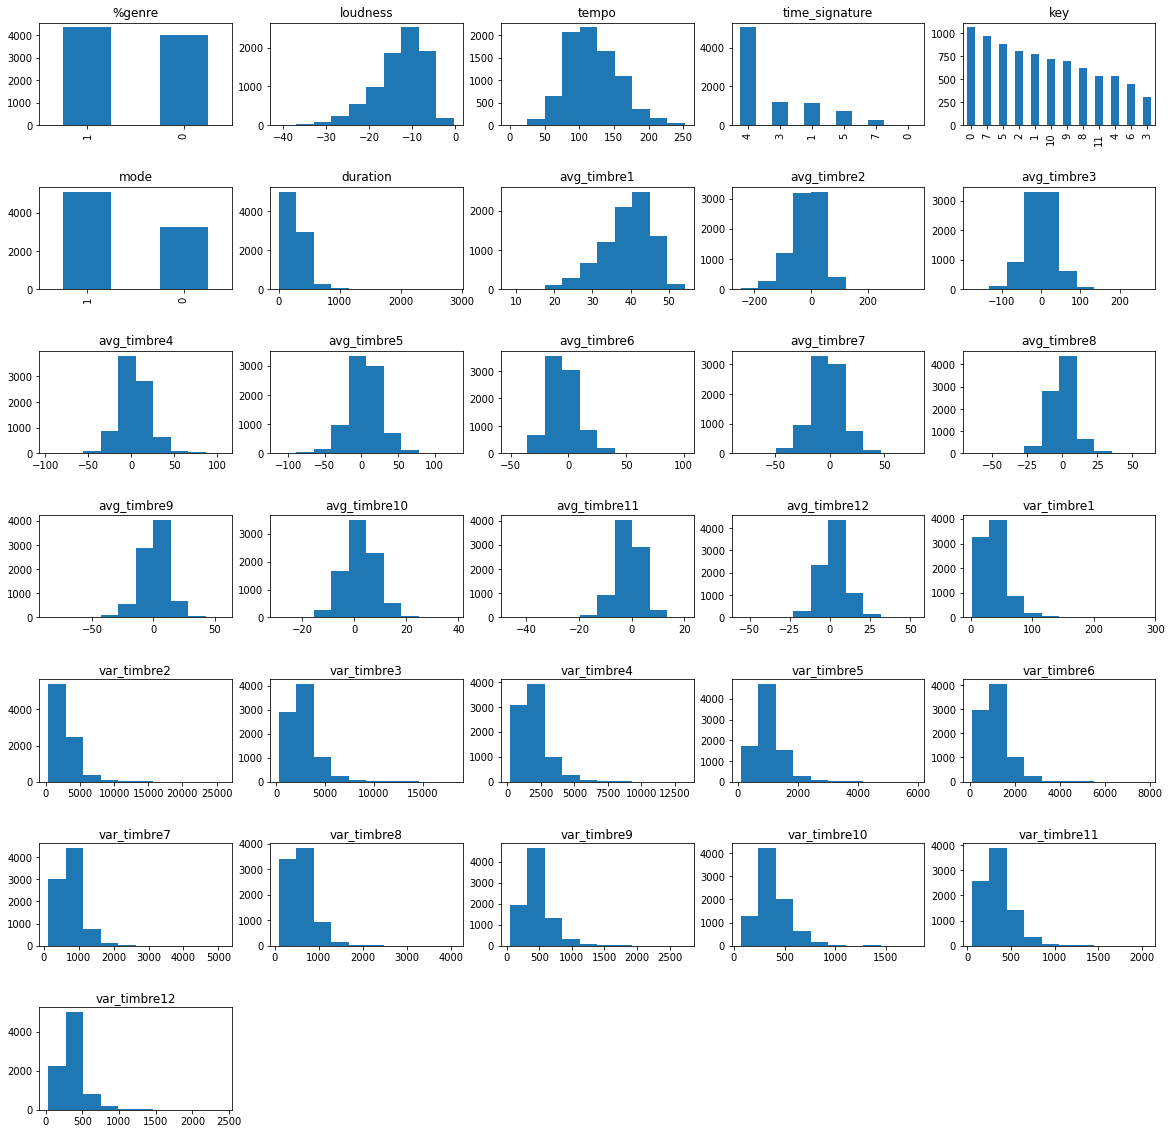

In [10]:
columnas = [columna for columna in datos.columns if datos[columna].dtype != "object"]
cols = 5
fig, axs = plt.subplots(len(columnas)//cols + 1, cols,figsize=(20,20) ) 
for i, columna in enumerate(columnas):
  if datos[columna].dtype!='float64':
      datos[columna].value_counts().plot(ax=axs[i//cols][i%cols], kind='bar')
      axs[i//cols][i%cols].set_title(columna)
  else:
    axs[i//cols][i%cols].hist(datos[columna])
    axs[i//cols][i%cols].set_title(columna)
plt.subplots_adjust(hspace=.6)
for i in range(1,5):
  axs[6][i].set_visible(False)
plt.show()

Podemos ver que las variables están más o menos distribuidas de forma uniforme a través de un rango fijo.

## Hot Encoding variables categóricas numéricas
Se encontraron dos variables categóricas numéricas en el conjunto de datos por lo que es mejor aplicar hot encoding con ellas que escalarlas pues no hacerlo implicaría que el nodelo tome, por ejemplo, una categoría que está codificada con el número 4 como 2 veces la categoría número 2 

In [11]:
varcat = ['key','time_signature']
datos['key'] = datos['key'].astype(str)
datos['time_signature'] = datos['time_signature'].astype(str)

temp = pd.get_dummies(datos[varcat])
temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,key_0,key_1,key_10,key_11,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,time_signature_7
48942,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48943,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
48944,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
48945,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48946,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59595,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
59596,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
59597,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
59598,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
datos = pd.concat([datos, temp], axis=1)
datos.drop(columns=varcat,inplace=True)
datos

,%genre,loudness,tempo,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12,key_0,key_1,key_10,key_11,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,time_signature_7
48942,1,-18.996,89.147,1,256.86159,34.738162,-50.948828,20.177101,15.139567,-25.836751,7.729854,-23.534951,-7.002408,9.661461,-0.752980,6.760097,17.112598,12.473302,1530.622764,1649.321047,1221.638146,501.717892,1091.743641,618.560018,402.236969,309.392602,233.206167,261.850703,240.834177,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48943,1,-19.347,125.825,1,301.87057,34.033346,-39.733083,30.640298,19.646264,-45.231415,9.103613,-19.019581,1.119047,9.169450,3.999394,5.481075,10.958845,11.150600,1385.186042,1670.689893,1339.193474,889.918742,1148.824912,428.976969,306.187624,368.973940,227.275123,261.643570,332.356536,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
48944,1,-9.472,121.707,1,158.85016,41.794197,-22.133118,3.518487,1.868059,13.542078,6.944006,15.406498,5.469637,4.822017,1.792601,-10.094489,-2.143374,41.497045,4513.995103,2640.398239,3070.791615,1347.758671,1499.491510,1015.076345,897.411739,608.034880,549.493210,481.149049,442.663136,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
48945,1,-14.406,83.012,1,181.26322,38.637530,-64.807191,-21.920418,-25.058971,-2.520459,-11.979187,-4.021518,-4.502840,1.350948,-6.206154,-2.557249,1.841054,26.279428,2304.536939,1187.644248,1311.170435,809.621938,612.699944,492.734025,525.801667,585.984445,278.578591,250.545027,348.842236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48946,1,-9.289,76.013,0,248.89424,43.089845,-27.351674,14.205832,-6.941388,21.278516,-9.627968,-6.894824,-2.730303,2.003291,-2.030266,-0.764775,1.769443,37.786419,3726.684916,1164.272074,1536.674490,1167.316436,580.604008,498.168561,607.747214,367.191519,403.532772,262.670577,272.634634,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59595,0,-10.162,88.951,1,348.96934,40.231725,46.282408,-13.655822,5.946664,14.348422,-2.672532,5.951254,6.642360,6.464162,15.298649,-9.405466,2.804328,42.698623,3135.495359,4339.425990,4081.017023,1248.530483,1655.677367,1000.603204,650.139870,487.150838,503.846148,641.508417,395.121718,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
59596,0,-5.466,130.615,1,332.32934,43.813328,5.111750,-2.705070,-3.683494,2.478473,-3.406668,9.211850,3.222463,14.685264,3.570673,-7.111661,0.793817,52.380335,2852.962520,3759.486850,3703.892394,1413.063618,1375.104641,951.467238,621.927699,418.507034,409.707771,504.899788,350.913794,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
59597,0,-9.494,88.976,1,182.04689,38.561170,21.603243,-43.954808,11.649718,-0.986997,-10.491520,-6.064987,-12.996223,8.259268,1.978779,1.043235,-2.172406,30.401080,2950.171909,4288.018243,3694.070826,1336.559501,1613.559675,1017.527699,1155.936991,422.885540,519.527734,538.895856,313.775934,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
59598,0,-7.617,67.929,1,169.42975,41.280131,8.233834,-41.325696,-1.864784,7.786002,0.071631,-14.726294,-6.791047,3.653238,11.307610,-5.241222,6.730477,32.521843,2362.093998,2846.537149,3655.514437,1811.926034,1705.581355,1024.020625,1052.533278,533.349475,591.853048,598.054091,443.893807,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Escalamiento de las variables
Dada la distribución de las variables los datos son normalizados a un mismo rango usando MixMaxScaler (Escalamiento lineal). De esta forma el modelo convergerá más rápido a una solución y esta será más precisa pues los rangos para todas las variables serán los mismos.

In [13]:
scaler = MinMaxScaler()

cols = list(datos.columns)
datos = scaler.fit_transform(datos)
datos = pd.DataFrame(datos, columns=cols)
datos.describe()

,%genre,loudness,tempo,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12,key_0,key_1,key_10,key_11,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,time_signature_7
count,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000
mean,0.519042,0.694886,0.474925,0.611737,0.103537,0.669107,0.375644,0.394281,0.491312,0.490098,0.305535,0.494023,0.517295,0.607779,0.464539,0.679492,0.532456,0.129365,0.096022,0.139371,0.137926,0.159176,0.135691,0.129129,0.128430,0.156741,0.182180,0.150474,0.141523,0.127305,0.093293,0.086228,0.063832,0.096766,0.036647,0.063593,0.105389,0.053772,0.116048,0.074012,0.083114,0.000479,0.137246,0.142515,0.604311,0.084910,0.030539
std,0.499667,0.142336,0.146295,0.487384,0.056424,0.142115,0.088782,0.086617,0.085269,0.093016,0.085633,0.094433,0.070145,0.078238,0.092953,0.073364,0.076464,0.072511,0.062662,0.082955,0.082313,0.076651,0.075584,0.065216,0.072650,0.082554,0.091573,0.085173,0.076294,0.333335,0.290861,0.280717,0.244469,0.295657,0.187904,0.244041,0.307073,0.225582,0.320302,0.261806,0.276071,0.021883,0.344127,0.349598,0.489027,0.278765,0.172075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.616708,0.368775,0.000000,0.072886,0.586706,0.324509,0.342559,0.439796,0.436255,0.247039,0.439412,0.477266,0.564565,0.404547,0.637258,0.486288,0.079960,0.055812,0.085623,0.083472,0.107810,0.083413,0.084855,0.079705,0.103171,0.119330,0.090499,0.097478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.719541,0.460153,1.000000,0.090745,0.690680,0.387319,0.396777,0.487582,0.491364,0.298044,0.493917,0.517320,0.612578,0.463945,0.682076,0.532052,0.116264,0.080942,0.123091,0.119392,0.146348,0.121329,0.118629,0.112886,0.139476,0.165667,0.134260,0.125772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.800761,0.568898,1.000000,0.119688,0.773755,0.435815,0.445412,0.538015,0.545243,0.353933,0.550413,0.558463,0.655290,0.525000,0.725161,0.576428,0.162971,0.119266,0.171512,0.171366,0.194361,0.171292,0.160129,0.161305,0.189098,0.228337,0.193092,0.164138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

In [14]:
datos.head()

,%genre,loudness,tempo,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12,key_0,key_1,key_10,key_11,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,time_signature_7
0,1.0,0.540775,0.353277,1.0,0.088999,0.575350,0.318832,0.442692,0.549958,0.363029,0.385309,0.360767,0.462401,0.669684,0.419899,0.797934,0.666495,0.038407,0.047278,0.076034,0.079438,0.068968,0.128698,0.099308,0.077007,0.097205,0.095678,0.106249,0.086422,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.532164,0.498627,1.0,0.104668,0.560022,0.337049,0.466187,0.572080,0.281699,0.394378,0.389008,0.527240,0.666231,0.490502,0.778664,0.610157,0.033756,0.041603,0.077229,0.088441,0.135484,0.136040,0.061473,0.052752,0.119388,0.092242,0.106146,0.124834,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.774436,0.482308,1.0,0.054880,0.728804,0.365637,0.405286,0.484811,0.528162,0.380122,0.604321,0.561974,0.635719,0.457717,0.544002,0.490205,0.140484,0.163703,0.131462,0.221055,0.213932,0.181143,0.178442,0.202052,0.208392,0.278903,0.215859,0.171129,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.653386,0.328965,1.0,0.062682,0.660153,0.296322,0.348165,0.352631,0.460805,0.255204,0.482811,0.482357,0.611359,0.338884,0.657558,0.526683,0.086964,0.077480,0.050214,0.086295,0.121725,0.067083,0.074197,0.108210,0.200183,0.121962,0.100599,0.131753,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.778925,0.301229,0.0,0.086226,0.756982,0.357160,0.429284,0.441567,0.560604,0.270725,0.464840,0.496508,0.615937,0.400923,0.684564,0.526027,0.127434,0.132979,0.048907,0.103565,0.183014,0.062955,0.075282,0.128904,0.118724,0.194348,0.106659,0.099769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Separación de los datos

### Separación de la variable objetivo de las demás variables

In [15]:
X = datos.drop('%genre',axis=1)
y = datos["%genre"]

### Separación del conjunto de validación y prueba de el de entrenamiento
Para el conjunto de validación y prueba se le asignará un tamaño del 20% del total de los datos (1670 datos), este conjunto será repartido posteriormente en partes iguales para cada uno, 10% del conjunto total de datos para el conjunto de prueba y 10% para el conjunto de validación.

In [16]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size = .2, random_state = 0)

X_train.shape, X_valtest.shape

((6680, 46), (1670, 46))

In [17]:
X_test, X_val, y_test, y_val = train_test_split(X_valtest, y_valtest, test_size = .5, random_state = 0)

X_test.shape, X_val.shape

((835, 46), (835, 46))

# Perceptrón multinivel de una capa
El código inferior se encargó de realizar todas las combinaciones posibles de los siguientes parámetros:

**Número de neuronas por capa**: Las potencias de 2 desde 1 hasta 8

**Función  de activación**: Las funciones identidad, logistica ( f(x) = 1 / (1 + exp(-x)) ), tangente hiperbólica y 'relu'(rectified linear unit function) f(x) = max(0, x).

**Solvers**: La optimización de peso, las posibles funciones fueron:
‘lbfgs’ un optimizador en la familia de los métodos quasi-Newton.
'sgd' se refiere al descenso de gradiente estocástico.
'adam' se refiere a un optimizador estocástico basado en gradientes propuesto por Kingma, Diederik y Jimmy Ba.

**Tasas de aprendizaje**: Se variaron pos las potencias de 10 desde -6 hasta 2.

Finalmente luego de probar todas las combinaciones y calculando el porcentaje de error según el conjunto de datos de validación, se organizó por este valor y se devolvió el que tuviera menor error. De esta forma se identifico la mejor combinación para el algoritmo MLPClassifier.

In [18]:
def busquedaHiperParametros():
  combinaciones = []

  unidades = [2**(i) for i in range(5)]
  activations = ["identity", "logistic", "tanh", "relu"]
  solvers = ["lbfgs", "sgd", "adam"]
  lrs = [1 * 10**(i) for i in range(-6,2)]
  for activation in activations:
      for solver in solvers:
          for lr in lrs:
            neuronas = []
            errores = []
            for i in unidades:
              clf = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=(i), learning_rate_init=lr,random_state=1, max_iter=1500) # hidden_layer_sizes=(x,y,...) para el capas >=2
              clf.fit(X_train, y_train)
              y_pred = clf.predict(X_val)
              error = mean_squared_error(y_val,y_pred)
              neuronas.append(i)
              errores.append(error)
            min = np.argmin(errores)
            print(f'Activación: {activation}, solver: {solver}, lr: {lr}, unidades usadas: {neuronas[min]}, mse:{errores[min]}')
            combinaciones.append((activation,solver,lr,neuronas[min],errores[min]))
  combinaciones.sort(key=lambda x: x[4])
  print(combinaciones)
  return combinaciones[0]
#print(busquedaHiperParametros())

## Puntajes obtenidos


In [19]:
def printMetrics(cm):
  TP = cm[0,0]
  TN = cm[1,1]
  FP = cm[0,1]
  FN = cm[1,0]

  print('Confusion matrix\n\n', cm)
  print('\nTrue Positives(TP) = ', TP)
  print('\nTrue Negatives(TN) = ', TN)
  print('\nFalse Positives(FP) = ', FP)
  print('\nFalse Negatives(FN) = ', FN)

  accuracy = (TP + TN) / float(TP + TN + FP + FN)
  precision = TP / float(TP + FP)
  recall = TP / float(TP + FN)

  print('Accuracy : {0:0.4f}'.format(accuracy))
  print('Precision : {0:0.4f}'.format(precision))
  print('Recall : {0:0.4f}'.format(recall))

def plotRoc(y,y_pred):
  fpr, tpr, threshold = roc_curve(y, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=(20,10))
  plt.title('Receiver Operating Characteristic (ROC)', fontsize=25)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right', fontsize=20)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.ylabel('True Positive Rate', fontsize=20)
  plt.xlabel('False Positive Rate', fontsize=20)
  plt.show()

Después de realizar todas las combinaciones posibles se determinó que la que menor error generaba era la siguiente combinación:
'logistic' como función de activación, 'lbfgs' como optimizador, 1*10^-6 de tasa de aprendizaje y 4 neuronas en la capa oculta.
A continuación se probará el modelo en el conjunto de prueba y se mostrará la matriz de confusión y la curva ROC la cual es una representación gráfica del desempeño del modelo.


In [20]:
clf = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(4), learning_rate_init=1*10**-6,random_state=1, max_iter=4000)
clf.fit(X_train, y_train)

y_prediction = clf.predict(X_test)
cm = confusion_matrix(y_test, y_prediction)
printMetrics(cm)

Confusion matrix

 [[356  52]
 [ 50 377]]

True Positives(TP) =  356

True Negatives(TN) =  377

False Positives(FP) =  52

False Negatives(FN) =  50
Accuracy : 0.8778
Precision : 0.8725
Recall : 0.8768


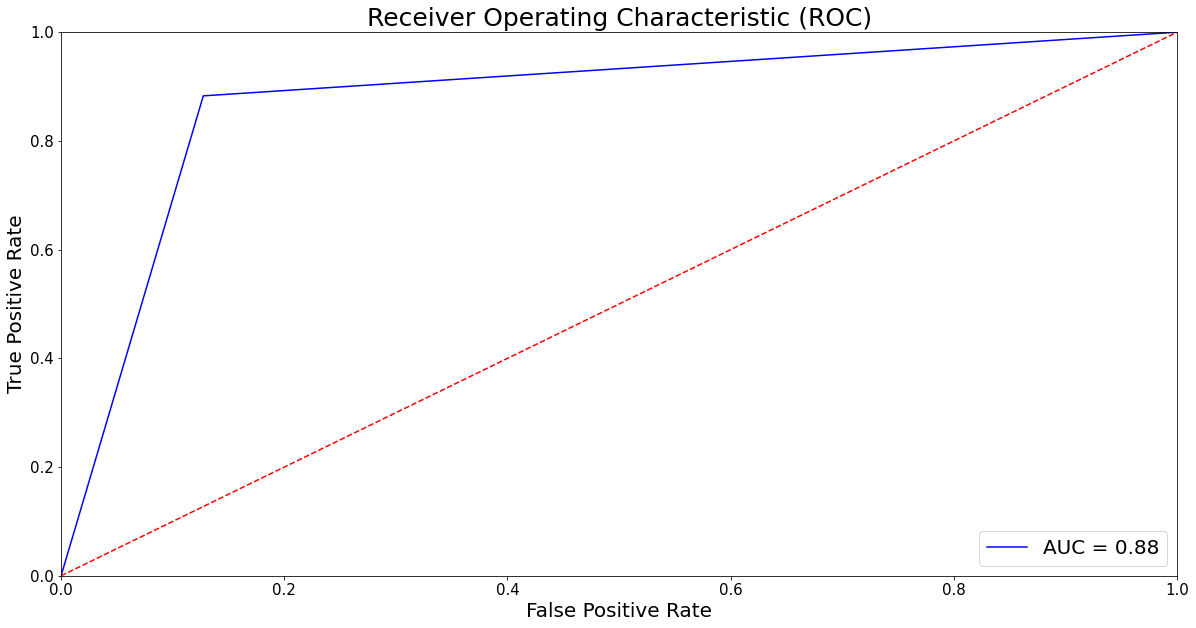

In [21]:
plotRoc(y_test,y_prediction)

# Perceptrón multinivel de 2 o más capas

Para el perecptrón multinivel de 2 o más capas Se mantuvo eligió usar 3 capas y la función usada para el perceptrón de una capa, para buscar el óptimo desempeño con ese número de capas ocultas.

In [22]:
#print(busquedaHiperParametros())

Después de realizar todas las combinaciones posibles con 3 capas ocultas se determinó que la que menor error generaba era la siguiente combinación:
'relu'(rectified linear unit function) f(x) = max(0, x) como función de activación, 'sgd' descenso de gradiente estocástico como optimizador, 0.01 de tasa de aprendizaje y 64 neuronas en las dos primeras capas ocultas y 32 en la última capa oculta.

A continuación se probará el modelo en el conjunto de prueba y se mostrará la matriz de confusión y la curva ROC la cual es una representación gráfica del desempeño del modelo.


In [23]:
clf = MLPClassifier(activation='relu',solver='sgd',hidden_layer_sizes=(64,64,32), learning_rate_init=0.01,random_state=1, max_iter=4000)
clf.fit(X_train, y_train)

y_prediction = clf.predict(X_test)
cm = confusion_matrix(y_test, y_prediction)
printMetrics(cm)

Confusion matrix

 [[369  39]
 [ 73 354]]

True Positives(TP) =  369

True Negatives(TN) =  354

False Positives(FP) =  39

False Negatives(FN) =  73
Accuracy : 0.8659
Precision : 0.9044
Recall : 0.8348


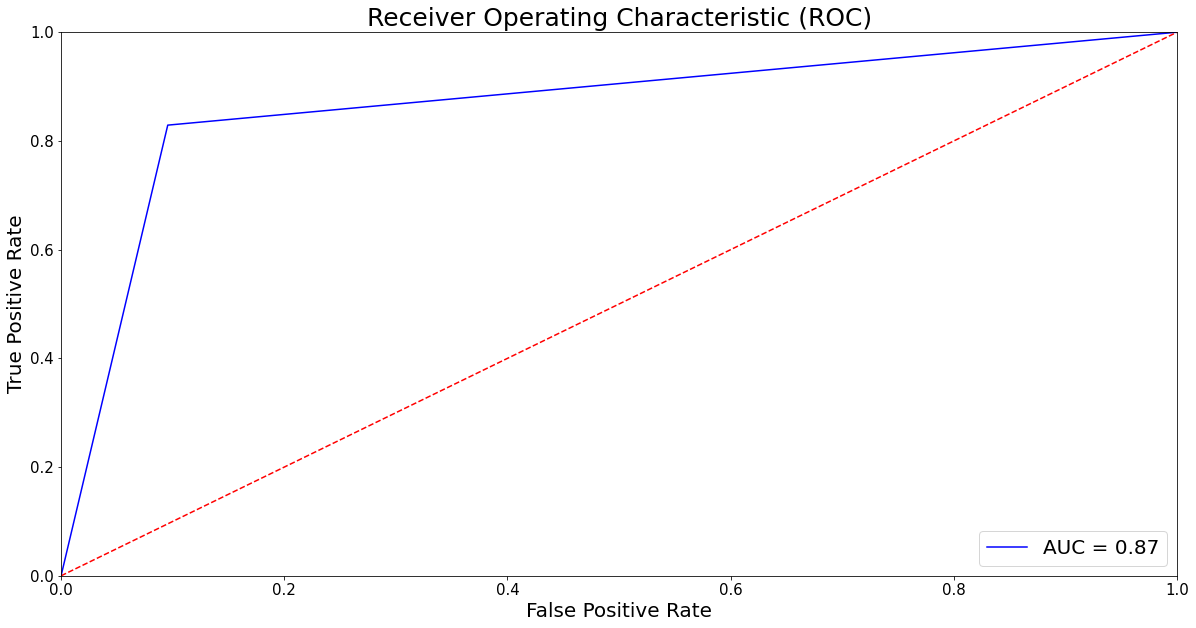

In [24]:
plotRoc(y_test,y_prediction)

# Conclusiones


*   El perceptrón de 3 capas ocultas presentó un mejor desempeño con las canciones de género _jazz and blues_ que el modelo de 1 capa oculta y viceversa
*   El modelo de una capa oculta presentó ligeramente una mayor área bajo la curva (AUC), esto puede deberse a diversos factores, entre ellos el hecho de que distintas combinaciones propuestas no convergían por lo que se incrementaba el número de iteraciones y al hacerlo a veces llegaban a presentar overflows lo que limitó las combinaciones de hiperparámetros intentadas que quizá pudieron dar mejores resultados.
*   Computacionalmente es preferible tener más capas ocultas que una sola capa con muchas neuronas. En este reto se evidenció que incluso es posible que una sola capa con pocas neuronas presente un desempeño decente para un problema de clasificación binaria.
